## BIOS 470/570 Lecture 12

## Last time we covered:
* ### Clustering single cell data
* ### controlling for unwanted sources of variability
  - #### regress_out function
* ### combining single cell datasets

## Today we will cover:
* 

In [13]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scvi

In [14]:
adata = sc.read_h5ad('data/multiBatch.h5ad')

In [15]:
adata = adata[~(adata.obs["label"] == "nan")].copy()

In [16]:
adata.layers["counts"] = adata.X.copy() #make a layer for the raw counts

sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
adata.raw = adata #set the raw data to the filtered, logarithimized data.

sc.pp.highly_variable_genes(adata, n_top_genes=3000)
adata = adata[:,adata.var.highly_variable]

cell_cycle_genes = [x.strip() for x in open('/Users/aw21/Github/scRNASeqWarmflash/scGenes.txt')]
s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]
sc.tl.score_genes_cell_cycle(adata, s_genes=s_genes, g2m_genes=g2m_genes)

In [17]:
scvi.model.SCVI.setup_anndata(adata,layer="counts",batch_key = "replicate")
vae = scvi.model.SCVI(adata, n_layers=2, n_latent=30)
vae.train()
adata.obsm["X_scVI"] = vae.get_latent_representation()
adata.layers["scvi_expr"] = vae.get_normalized_expression(adata)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 400/400: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 400/400 [31:48<00:00,  3.98s/it, loss=1.17e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 400/400 [31:48<00:00,  4.77s/it, loss=1.17e+03, v_num=1]


In [ ]:
sc.tl.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

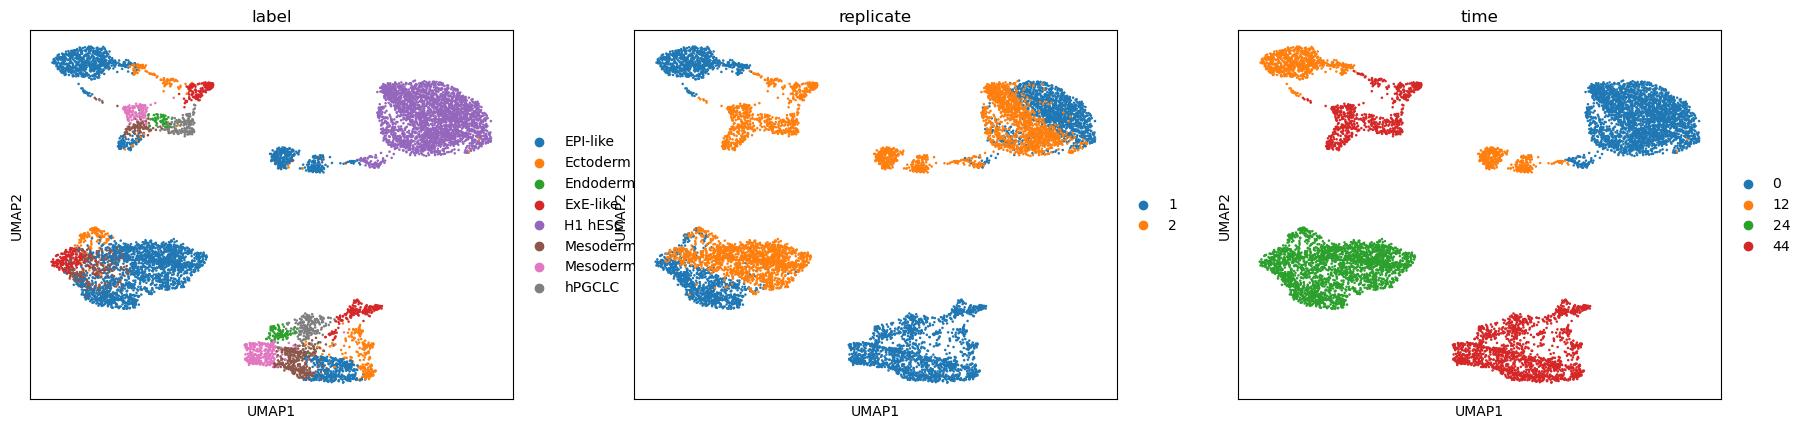

In [21]:
sc.pl.umap(adata, color = ["label","replicate","time"])

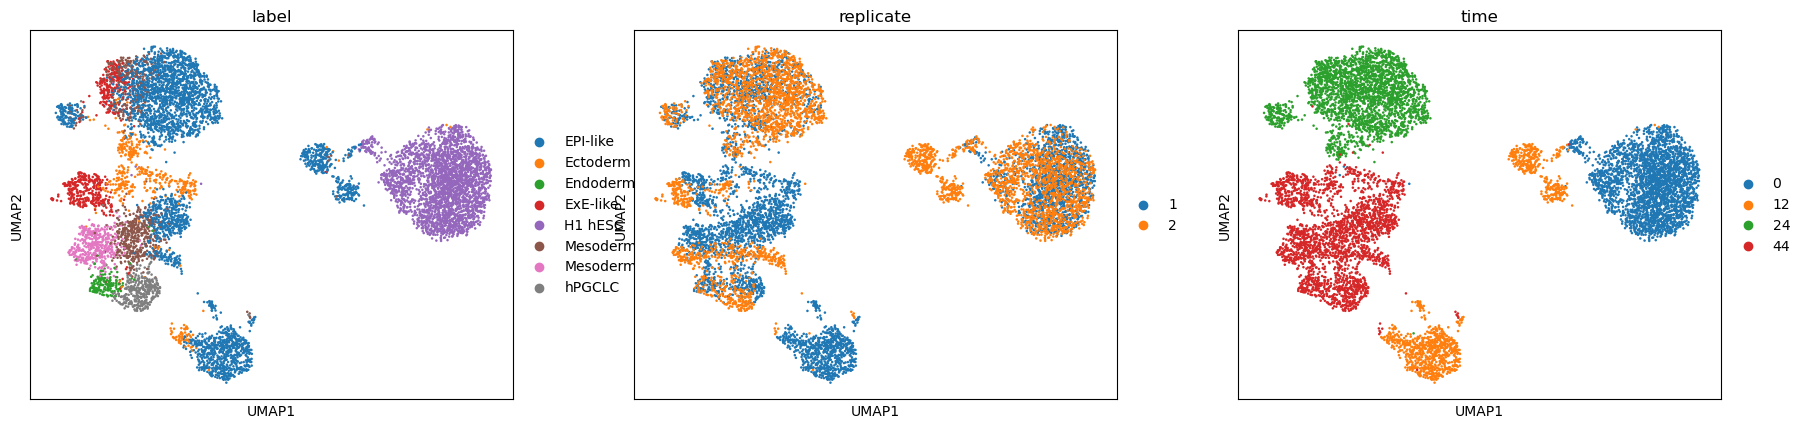

In [19]:
sc.pp.neighbors(adata,use_rep="X_scVI")
sc.tl.umap(adata)
sc.pl.umap(adata, color = ["label","replicate","time"])